In [26]:
import pandas as pd
import numpy as numpy
from scipy import stats
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


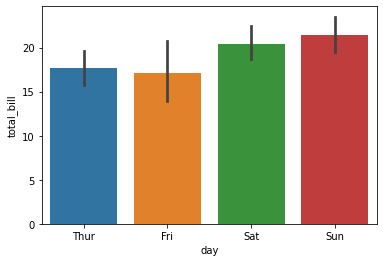

In [8]:
%matplotlib inline
sns.barplot(x = "day", y = "total_bill", data = tips); 

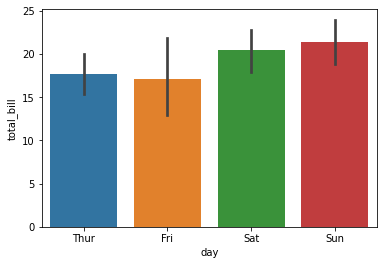

In [9]:
%matplotlib inline
sns.barplot(x = "day", y = "total_bill", data = tips, ci = 99);

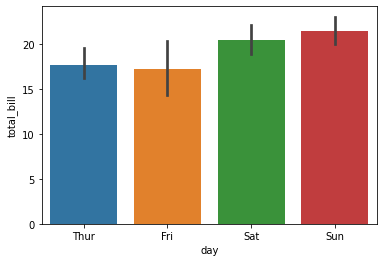

In [10]:
%matplotlib inline
sns.barplot(x = "day", y = "total_bill", data = tips, ci = 90);

In [13]:
tipsFri = tips[tips["day"]=="Fri"]

In [14]:
tipsFri["total_bill"].mean()

17.151578947368417

In [20]:
s = tipsFri["total_bill"].std()
s

8.302659723217143

In [18]:
print(tipsFri.shape[0])
print(len(tipsFri))

19
19


In [22]:
n = len(tipsFri)
n

19

In [24]:
sem = s / np.sqrt(n)
sem

<IPython.core.display.Javascript object>

1.904760773479416

In [31]:
xbar = tipsFri["total_bill"].mean()
xbar

17.151578947368417

In [25]:
tipsFri["total_bill"].sem()

1.904760773479416

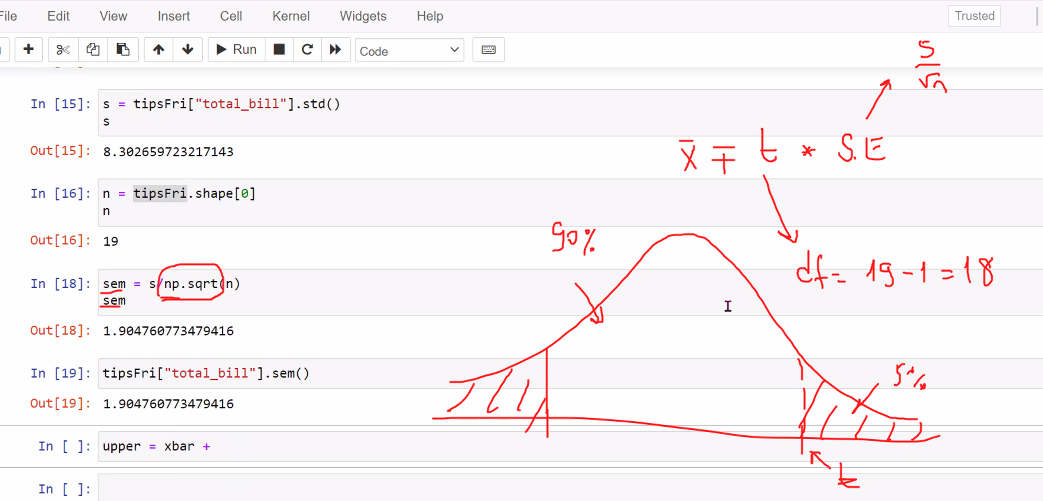

In [27]:
stats.t.ppf(0.95, 18)

1.7340636066175354

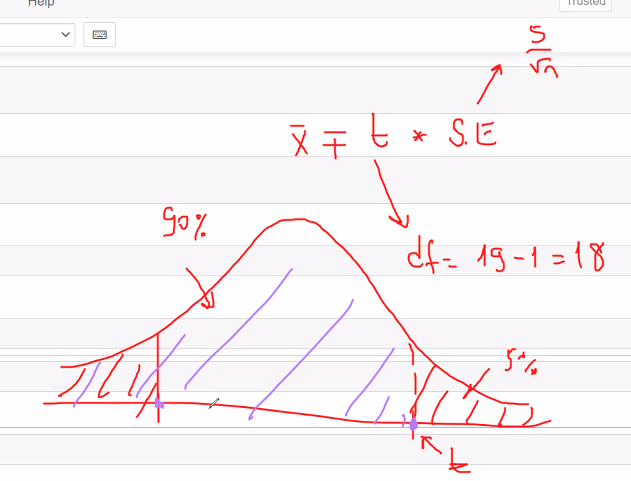

In [28]:
stats.t.ppf(0.05, 18)

-1.734063606617536

In [32]:
upper = xbar + 1.734 * sem
upper

20.454434128581724

In [33]:
lower = xbar - 1.734 * sem
lower

13.84872376615511

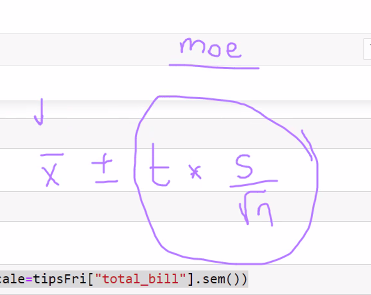

In [34]:
stats.t.ppf(0.95, 18)

1.7340636066175354

In [35]:
stats.t.interval(0.90, 18, loc = xbar, scale = sem)

(13.848602610765093, 20.45455528397174)

In [36]:
stats.t.interval(0.90, 18, loc=tipsFri["total_bill"].mean(), scale=tipsFri["total_bill"].sem())

(13.848602610765093, 20.45455528397174)

In [41]:
# Assignment2-1 (interval)
stats.t.interval(0.99, 129, loc=98.25, scale=0.73/np.sqrt(130))

<IPython.core.display.Javascript object>

(98.08260738705933, 98.41739261294067)

In [42]:
# Assignment2-1 (t)
stats.norm.interval(0.99, loc=98.25, scale=0.73/np.sqrt(130))

<IPython.core.display.Javascript object>

(98.08508192246582, 98.41491807753418)

In [ ]:
# HYPOTHESIS TESTING

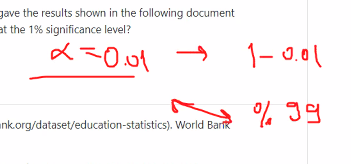

In [48]:
# Results for two type of soils

dfsoil = pd.read_csv("Statistics_Assignment_5_(Hypothesis_Tests)_soil - Sheet1.csv", sep = ",")

<IPython.core.display.Javascript object>

In [49]:
dfsoil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [50]:
dfsoil.shape

(35, 2)

In [51]:
dfsoil["Soil1"].mean()

1.6918

In [52]:
dfsoil["Soil2"].mean()

1.4171142857142855

In [53]:
# H0 : mu1 = mu2
# H1 : mu1 != mu2

In [54]:
stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"])

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=nan, pvalue=nan)

In [55]:
dfsoil.isnull()

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [56]:
dfsoil.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

In [57]:
dfsoil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [58]:
# with nan_policy='omit'

indTest = stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"], nan_policy='omit')

<IPython.core.display.Javascript object>

In [59]:
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [60]:
# with dropna() applied for only one column named "soil1" with "Nan"

indTest1 = stats.ttest_ind(dfsoil.dropna()["Soil1"], dfsoil["Soil2"])

<IPython.core.display.Javascript object>

In [61]:
indTest1

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [62]:
# with dropna() applied for two columns named "soil1" with "Nan" and "soil2" without "Nan"

indTest2 = stats.ttest_ind(dfsoil.dropna()["Soil1"], dfsoil.dropna()["Soil2"])

<IPython.core.display.Javascript object>

In [63]:
indTest2

Ttest_indResult(statistic=5.134893443609086, pvalue=3.4402046436336477e-06)

In [64]:
dfsoil.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


In [65]:
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [66]:
indTest.statistic

5.1681473319343345

In [67]:
indTest.pvalue

2.59322873235282e-06

In [68]:
# Using p value

alpha = 0.01

if indTest.pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [69]:
dfsoil.shape

(35, 2)

In [70]:
negt005 = stats.t.ppf(0.005, 63) # t score of critical value for alpha=0.01/2
negt005

<IPython.core.display.Javascript object>

-2.6561450297622597

In [71]:
# Using t score for left tail which has a negative value

negz005 = -2.6561450297622597

if -(indTest.statistic) < negz005:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


In [72]:
pozt005 = stats.t.ppf(0.995, 63) # t score of critical value for alpha=0.01/2
pozt005

<IPython.core.display.Javascript object>

2.656145029762259

In [73]:
# Using t score for right tail which has a positive value

posz005 = -2.6561450297622597

if indTest.statistic > abs(negz005):
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


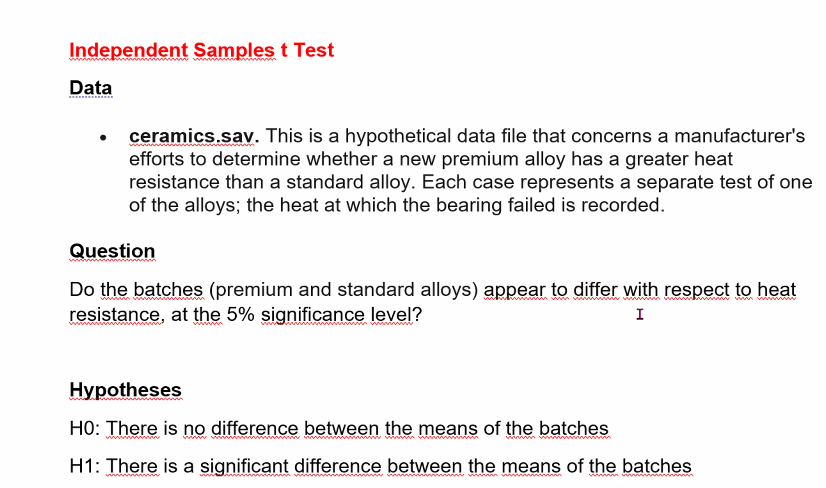

In [1]:
dfcer = pd.read_csv("ceramics.csv", sep = ",")

<IPython.core.display.Javascript object>

In [2]:
dfcer.head()

,id,lab,batch,temp,labrunid
0,1,1,1,1555.921536,a 1
1,2,1,2,1513.108758,a 2
2,3,1,1,1534.644568,a 3
3,4,1,2,1532.648024,a 4
4,5,1,1,1535.921379,a 5


In [3]:
dfcer.shape

(480, 5)

In [34]:
dfcer.isnull().sum()

id          0
lab         0
batch       0
temp        0
labrunid    0
dtype: int64

<AxesSubplot:title={'center':'temp'}, xlabel='batch'>

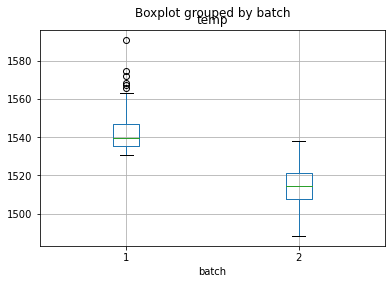

In [4]:
dfcer.boxplot("temp", by="batch")

In [35]:
dfcer.batch.value_counts()

1    240
2    240
Name: batch, dtype: int64

In [37]:
batch1 = dfcer[dfcer["batch"]==1]["temp"]
batch1

0      1555.921536
2      1534.644568
4      1535.921379
6      1531.971576
8      1535.313594
          ...     
470    1548.542888
472    1549.095133
474    1530.733621
476    1561.529391
478    1544.274788
Name: temp, Length: 240, dtype: float64

In [38]:
batch2 = dfcer[dfcer["batch"]==2]["temp"]
batch2

1      1513.108758
3      1532.648024
5      1512.763199
7      1507.347575
9      1525.327790
          ...     
471    1507.151327
473    1516.175165
475    1517.475271
477    1508.440945
479    1496.627674
Name: temp, Length: 240, dtype: float64

In [32]:
dfcer[dfcer["batch"]==1]["temp"].mean()

1542.078673714374

In [33]:
dfcer[dfcer["batch"]==2]["temp"].mean()

1514.6564264113426

In [36]:
# H0 : mu1 = mu2
# H1 : mu1 != mu2

In [39]:
# equal_var = False, alternative = 'two-sided'

indTest1 = stats.ttest_ind(batch1, batch2, equal_var = False, alternative = 'two-sided')
indTest1

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=31.48504665961039, pvalue=1.2559198648025654e-118)

In [16]:
# H0 : mu1 = mu2
# H1 : mu1 > mu2

In [40]:
# equal_var=False, alternative='greater'

indTest2 = stats.ttest_ind(batch1, batch2, equal_var=False, alternative='greater')
indTest2

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=31.48504665961039, pvalue=6.279599324012827e-119)

In [42]:
# with default parameters

# stats.ttest_ind(
#     a,
#     b,
#     axis=0,
#     equal_var=True,
#     nan_policy='propagate',
#     permutations=None,
#     random_state=None,
#     alternative='two-sided',
#     trim=0,
# )

indTest = stats.ttest_ind(batch1, batch2)
indTest

<IPython.core.display.Javascript object>

Ttest_indResult(statistic=31.48504665961039, pvalue=1.2311249084838586e-118)

In [43]:
indTest

Ttest_indResult(statistic=31.48504665961039, pvalue=1.2311249084838586e-118)

In [44]:
indTest.statistic

31.48504665961039

In [45]:
indTest.pvalue

1.2311249084838586e-118

In [46]:
# Using p value

alpha = 0.05

if indTest.pvalue < alpha/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
